In [11]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk  # Import nltk before using it

nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: Improves WordNet performance

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv


In [12]:
import pandas as pd

train_df = pd.read_csv("/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv")

In [13]:
import nltk
import subprocess
from nltk.stem import WordNetLemmatizer 

nltk.download('wordnet', download_dir='/kaggle/working/')
nltk.download('omw-1.4', download_dir='/kaggle/working/')

command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
subprocess.run(command.split())

nltk.data.path.append('/kaggle/working/')

lemmatizer = WordNetLemmatizer()

train_df['Sentiment'] = train_df['Sentiment'].astype(str).str.strip().str.lower().apply(lemmatizer.lemmatize)
print(train_df['Sentiment'].value_counts())

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /kaggle/working/...
[nltk_data]   Package omw-1.4 is already up-to-date!
Sentiment
positive         45
joy              44
excitement       37
contentment      19
neutral          18
                 ..
joy in baking     1
elegance          1
pensive           1
melodic           1
festivejoy        1
Name: count, Length: 191, dtype: int64


[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /kaggle/working/...
[nltk_data]   Package omw-1.4 is already up-to-date!


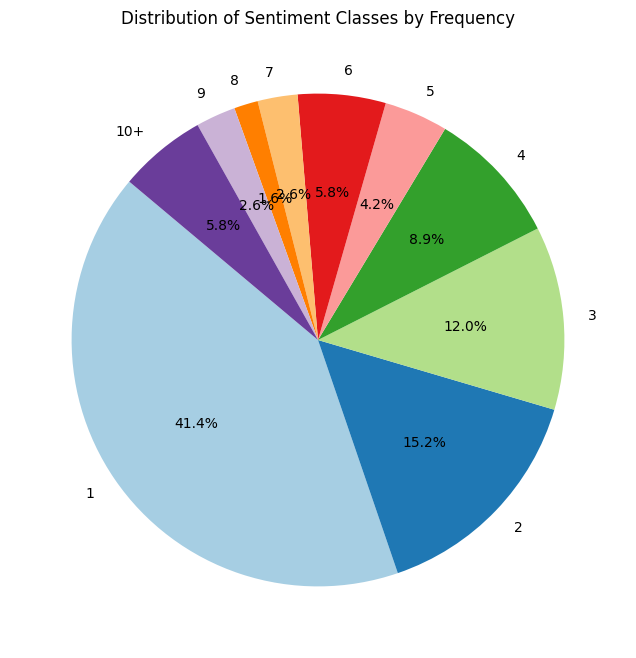

(11,
    Sentiment Class  Record Count
 0         positive            45
 1              joy            44
 2       excitement            37
 3      contentment            19
 4          neutral            18
 5        gratitude            18
 6        curiosity            16
 7         serenity            15
 8            happy            14
 9          despair            11
 10       nostalgia            11)

In [14]:
import nltk
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import WordNetLemmatizer 

nltk.download('wordnet', download_dir='/kaggle/working/')
nltk.download('omw-1.4', download_dir='/kaggle/working/')

command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
subprocess.run(command.split())

nltk.data.path.append('/kaggle/working/')

lemmatizer = WordNetLemmatizer()

train_df['Sentiment'] = train_df['Sentiment'].astype(str).str.strip().str.lower().apply(lemmatizer.lemmatize)
sentiment_counts = train_df['Sentiment'].value_counts()

bins = {i: 0 for i in range(1, 10)}
bins["10+"] = 0
num_classes_10_plus = 0

for count in sentiment_counts.values:
    if count >= 10:
        bins["10+"] += 1
        num_classes_10_plus += 1
    else:
        bins[count] += 1

labels = [str(k) for k in bins.keys()]
values = list(bins.values())

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Sentiment Classes by Frequency")
plt.show()

sentiment_df = pd.DataFrame({"Sentiment Class": sentiment_counts.index, "Record Count": sentiment_counts.values})
num_classes_10_plus, sentiment_df[sentiment_df['Record Count'] >= 10]


In [15]:
unique_values = set()
unique_values.update(train_df['Sentiment'])
unique_values

{'acceptance',
 'accomplishment',
 'admiration',
 'adoration',
 'adrenaline',
 'adventure',
 'affection',
 'amazement',
 'ambivalence',
 'amusement',
 'anger',
 'anticipation',
 'anxiety',
 'appreciation',
 'apprehensive',
 'arousal',
 'artisticburst',
 'awe',
 'bad',
 'betrayal',
 'bitter',
 'bitterness',
 'bittersweet',
 'blessed',
 'boredom',
 'breakthrough',
 'calmness',
 'captivation',
 'celebration',
 'celestial wonder',
 'challenge',
 'charm',
 'colorful',
 'compassion',
 'compassionate',
 'confidence',
 'confident',
 'confusion',
 'connection',
 'contemplation',
 'contentment',
 'coziness',
 'creative inspiration',
 'creativity',
 'culinary adventure',
 'culinaryodyssey',
 'curiosity',
 'darkness',
 'dazzle',
 'desolation',
 'despair',
 'desperation',
 'determination',
 'devastated',
 'disappointed',
 'disappointment',
 'disgust',
 'dismissive',
 'dreamchaser',
 'ecstasy',
 'elation',
 'elegance',
 'embarrassed',
 'emotion',
 'emotionalstorm',
 'empathetic',
 'empowerment',
 'e

In [ ]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
!python -m spacy download en_core_web_md

nlp = spacy.load("en_core_web_md")

ref_words = {
    "Positive": "positive",
    "Negative": "negative",
    "Neutral": "neutral"
}

ref_vectors = {category: nlp(word).vector for category, word in ref_words.items()}

def assign_sentiment_category(sentiment):
    word_vector = nlp(sentiment).vector.reshape(1, -1)
    
    similarities = {}
    for category, ref_vec in ref_vectors.items():
        ref_vec = ref_vec.reshape(1, -1)
        sim = cosine_similarity(word_vector, ref_vec)[0][0]
        similarities[category] = sim

    return max(similarities, key=similarities.get)

train_df['Sentiment'] = train_df['Sentiment'].apply(assign_sentiment_category)

print(train_df['Sentiment'].value_counts())

In [ ]:
!pip install nltk  

import nltk
nltk.download('stopwords')  
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F700-\U0001F77F" 
                           u"\U0001F780-\U0001F7FF"  
                           u"\U0001F800-\U0001F8FF" 
                           u"\U0001F900-\U0001F9FF" 
                           u"\U0001FA00-\U0001FA6F" 
                           u"\U0001FA70-\U0001FAFF" 
                           u"\U00002702-\U000027B0" 
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

def split_and_remove_stopwords(text):
    text = emoji_pattern.sub(r'', text)
    tokens = text.split()

    filtered_tokens = [
        stemmer.stem(lemmatizer.lemmatize(word.lower().rstrip(string.punctuation)))
        for word in tokens if stemmer.stem(word.lower().rstrip(string.punctuation)) not in stop_words
    ]

    return filtered_tokens

train_df['Text'] = train_df['Text'].apply(split_and_remove_stopwords)

print(train_df['Text'])

In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

train_df['Text'] = train_df['Text'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

sentences = [text.split() for text in train_df['Text']]
w2v_model = Word2Vec(sentences, vector_size=300, window=7, min_count=2, workers=4, sg=1, negative=10, epochs=100)

def get_complex_sentence_vector(sentence, model, vector_size=300):
    vectors = [model.wv[word] for word in sentence.split() if word in model.wv]
    if vectors:
        vectors = np.array(vectors)
        avg_vec = np.mean(vectors, axis=0)
        max_vec = np.max(vectors, axis=0)
        min_vec = np.min(vectors, axis=0)
        std_vec = np.std(vectors, axis=0)
        return np.concatenate([avg_vec, max_vec, min_vec, std_vec])
    else:
        return np.zeros(vector_size * 4)

train_df['vector'] = train_df['Text'].apply(lambda x: get_complex_sentence_vector(x, w2v_model))

label_encoder = LabelEncoder()
train_df['Sentiment'] = label_encoder.fit_transform(train_df['Sentiment'])

X_w2v = np.vstack(train_df['vector'].values)
y = train_df['Sentiment'].values.astype(np.int32)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=900)
X_tfidf = vectorizer.fit_transform(train_df['Text']).toarray()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies_w2v = []
accuracies_tfidf = []

def train_model(X, y, input_dim):
    fold_accuracies = []
    best_model = None
    best_accuracy = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = Sequential([
            Input(shape=(input_dim,)),
            Dense(2048), LeakyReLU(alpha=0.1), BatchNormalization(), Dropout(0.5),
            Dense(1024), LeakyReLU(alpha=0.1), BatchNormalization(), Dropout(0.5),
            Dense(512), LeakyReLU(alpha=0.1), BatchNormalization(), Dropout(0.5),
            Dense(256), LeakyReLU(alpha=0.1), BatchNormalization(), Dropout(0.4),
            Dense(128), LeakyReLU(alpha=0.1), BatchNormalization(), Dropout(0.4),
            Dense(len(np.unique(y)), activation='softmax')
        ])

        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

        model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler], verbose=1)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        fold_accuracies.append(accuracy)

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return np.mean(fold_accuracies), best_model

mean_accuracy_w2v, model_w2v = train_model(X_w2v, y, 1200)
mean_accuracy_tfidf, model_tfidf = train_model(X_tfidf, y, X_tfidf.shape[1])

if mean_accuracy_w2v > mean_accuracy_tfidf:
    print(f"Best model: Word2Vec-based model with Mean Accuracy: {mean_accuracy_w2v:.4f}")
else:
    print(f"Best model: TF-IDF-based model with Mean Accuracy: {mean_accuracy_tfidf:.4f}")
    

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
=
y_pred_w2v = np.argmax(model_w2v.predict(X_w2v), axis=1)
y_pred_tfidf = np.argmax(model_tfidf.predict(X_tfidf), axis=1)

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
=
plot_confusion_matrix(y, y_pred_w2v, "Word2Vec Model")

plot_confusion_matrix(y, y_pred_tfidf, "TF-IDF Model")